In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#data_file = '/Users/yasaman/UWEXP/analysis-scripts/combined/results/bigtable_UWonly.csv'
data_file = '/Users/yasaman/UWEXP/analysis-scripts/surveys/results/emaaggregation/aggregated-horizontal-numVal-internalID.csv'
#PIDs2remove = ['018', '026', '027', '041', '053', '056', '069', '071', '081', '083', '085', '089', '100', '101', '107', 
#               '112', '114', '119', '121', '129', '131', '133', '135', '139', '141', '147', '152', '164', '182', '192', 
#               '197', '200', '208']
PIDs2remove = [18, 26, 27, 41, 53, 56, 69, 71, 81, 83, 85, 89, 100, 101, 107, 112, 114, 119, 121, 129, 131, 133, 135, 
               139, 141, 147, 152, 164, 182, 192, 197, 200, 208]
data = pd.read_csv(data_file)
data = data[~data['PID'].isin(PIDs2remove)]

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
columns = list(data.columns)
columns

In [3]:
surveys = ['morning', 'midday1', 'midday2', 'evening', 'weekly']
affect_items = ['anxious', 'depressed', 'frustrated', 'overwhelmed', 'lonely', 'happy', 'connected']
affect_columns = ['feel_'+affect+'_'+survey for affect in affect_items for survey in surveys]

In [4]:
data_affect = data[['PID', 'date', 'discriminated'] + affect_columns]

# response distribution

In [5]:
counts_per_level = data_affect[affect_columns].apply(lambda x : x.value_counts())
for affect in affect_items:
    counts_per_level[affect] = counts_per_level[['feel_'+affect+'_'+survey for survey in surveys]].sum(axis=1)
counts_per_level[affect_items]

,anxious,depressed,frustrated,overwhelmed,lonely,happy,connected
1.0,9471,13794,11219,7323,12106,2005,2612
2.0,6438,4320,5128,6133,5943,5580,5604
3.0,3857,2401,3232,4158,2333,7866,7022
4.0,1178,662,1315,2554,784,4831,4466
5.0,526,293,575,1299,303,1187,1762


[Text(0,0,'not at all'),
 Text(0,0,'a little'),
 Text(0,0,'moderately'),
 Text(0,0,'quite a bit'),
 Text(0,0,'extremely')]

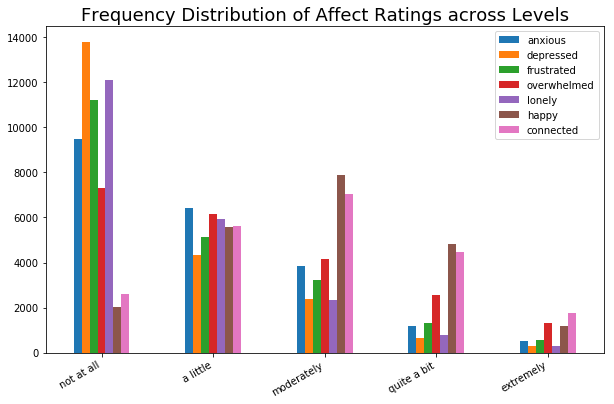

In [6]:
ax = counts_per_level[affect_items].plot.bar(figsize=(10, 6))
ax.set_title('Frequency Distribution of Affect Ratings across Levels', fontsize=18)
ax.set_xticklabels(['not at all', 'a little', 'moderately', 'quite a bit', 'extremely'], rotation=30, ha='right')

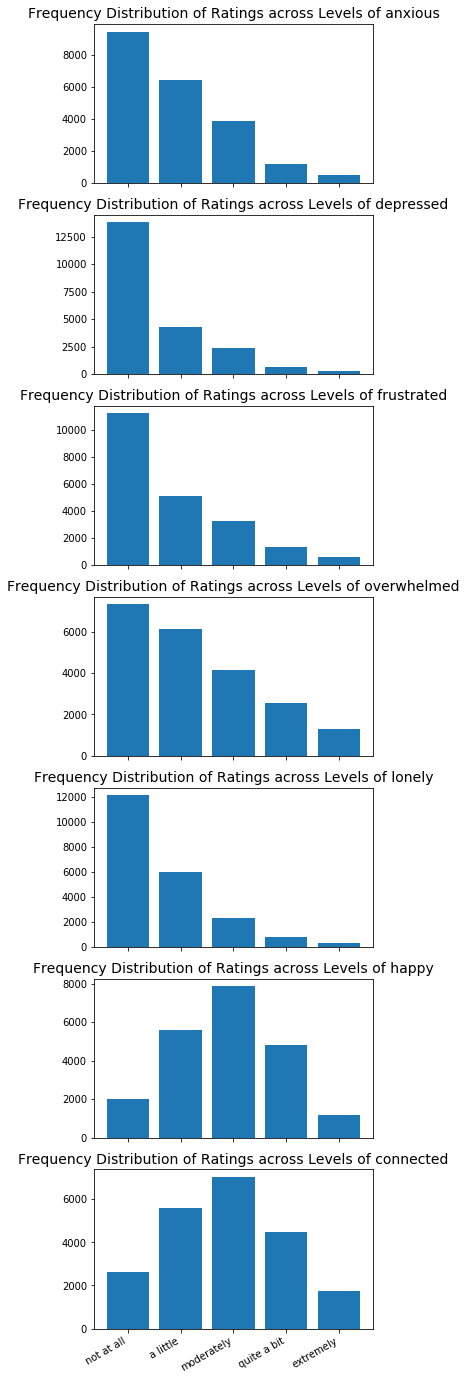

In [7]:
fig, axes = plt.subplots(len(affect_items), 1, figsize=(5, 24), sharex=True)  

#for index, affect in enumerate(affect_items):
#    ax = counts_per_level[affect].plot.bar(ax=axes[index])
#    ax.set_title('Frequency Distribution of {} Ratings across Levels'.format(affect), fontsize=14)
#    ax.set_xticklabels(['not at all', 'a little', 'moderately', 'quite a bit', 'extremely'], rotation=30, ha='right')

for index, affect in enumerate(affect_items):
    ax = axes[index]
    ax.bar(counts_per_level.index.values, counts_per_level[affect].values)
    ax.set_title('Frequency Distribution of Ratings across Levels of {}'.format(affect), fontsize=14)
    ax.set_xticks(counts_per_level.index.values)
    ax.set_xticklabels(['not at all', 'a little', 'moderately', 'quite a bit', 'extremely'], rotation=30, ha='right')

In [8]:
distribution = counts_per_level.apply(lambda x: x/sum(x))
# NOTE this is equivalent to:
# distribution = counts_per_level[affect_items].div(counts_per_level[affect_items].sum(), axis=1)
# axis in div is the axis along which count_per_level and counts_per_level[affect_items].sum() are aligned. To 
# normalize columns, I want to align each column of count_per_level to each column of 
# counts_per_level[affect_items].sum()

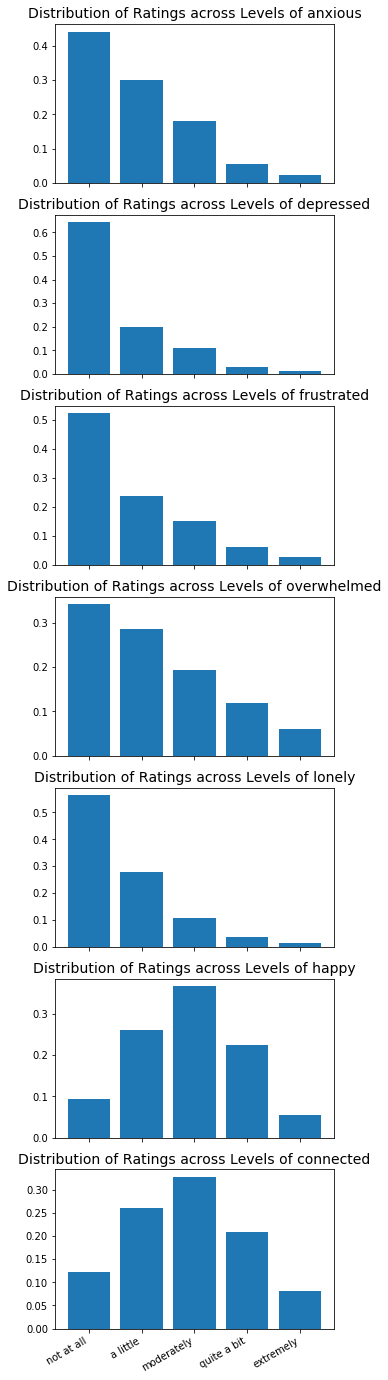

In [9]:
fig, axes = plt.subplots(len(affect_items), 1, figsize=(5, 24), sharex=True)  
for index, affect in enumerate(affect_items):
    ax = axes[index]
    ax.bar(distribution.index.values, distribution[affect].values)
    ax.set_title('Distribution of Ratings across Levels of {}'.format(affect), fontsize=14)
    ax.set_xticks(counts_per_level.index.values)
    ax.set_xticklabels(['not at all', 'a little', 'moderately', 'quite a bit', 'extremely'], rotation=30, ha='right')

# What else?